In [13]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt 

def imshow(title ="image",image = None, size= 10 ):
    w, h =image.shape[0],image.shape[1]
    aspect_ratio =  w/h
    plt.figure(figsize=(size*aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.show()


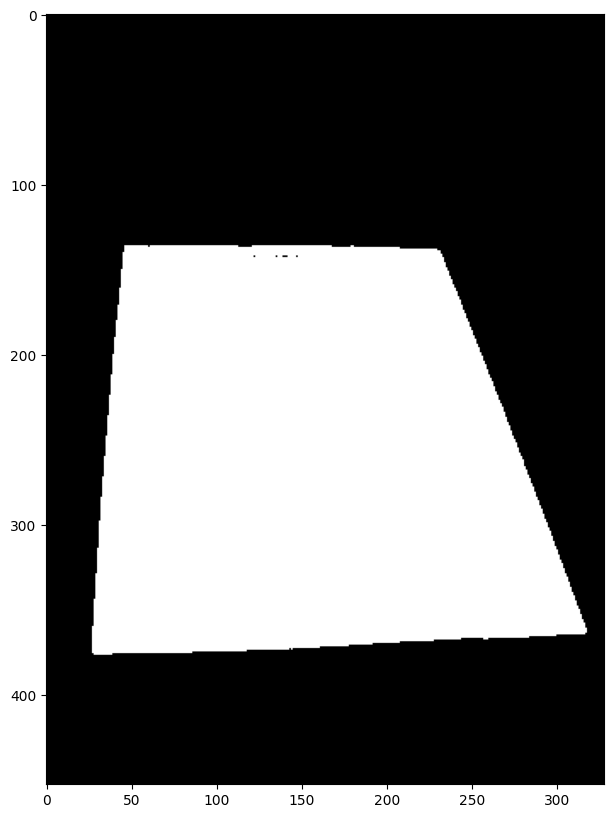

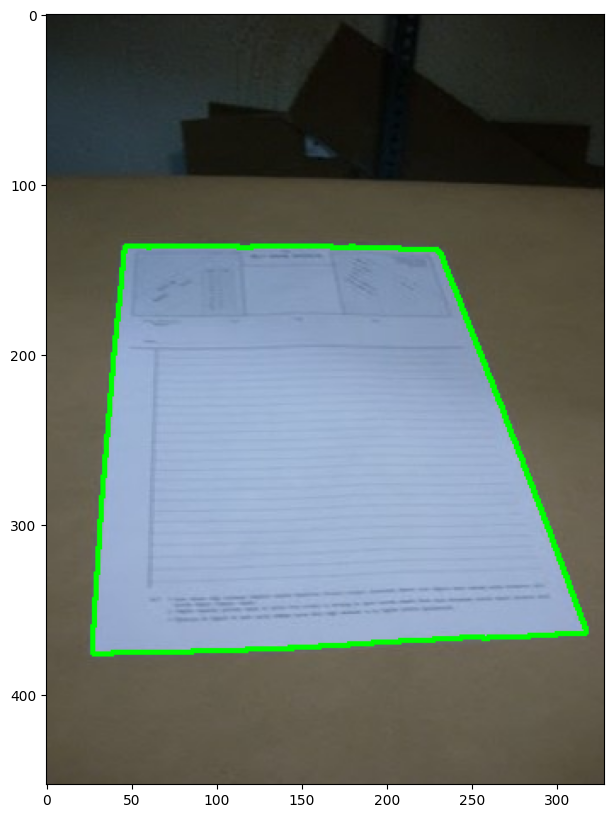

In [14]:
import cv2 
import numpy as np
image = cv2.imread(r'C:\Users\cengh\Desktop\ComputerVison\PerspectiveTransforms\kagit.jpg')

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

_ ,th2 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow("after thresholding",th2) 
contours , hieararchy = cv2.findContours(th2,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 
cv2.drawContours(image , contours,-1,(0,255,0),thickness=2)
imshow("after drow",image)

In [15]:
sorted_contours = sorted(contours,key=cv2.contourArea,reverse=True)
#loop contouers
for cnt in sorted_contours:
    #aprroximate contours
    perimeter = cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,0.05 * perimeter,True)
    if len(approx==4):
        break

print(approx)

[[[ 46 136]]

 [[ 28 376]]

 [[317 363]]

 [[231 139]]]


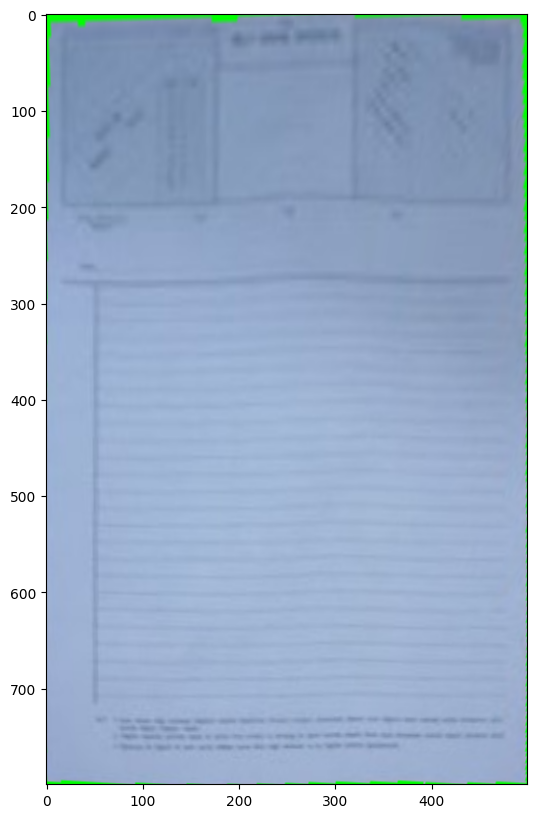

In [16]:
inputPTS = np.float32(approx)
outPTS = np.float32([[0, 0], [0,800], [500, 800], [500, 0]])
M = cv2.getPerspectiveTransform(inputPTS,outPTS)
dst = cv2.warpPerspective(image,M,(500,800))
imshow('perspectice dust',dst)